In [1]:
# importing the required library
import numpy as np
import pandas as pd
import networkx as nx
import yfinance as yf
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
# import visualization method
from unicodedata import normalize
from mlfinlab.networks.visualisations import generate_mst_server
from mlfinlab.networks.visualisations import generate_pmfg_server
from mlfinlab.networks.pmfg import PMFG
from mlfinlab.networks.mst import MST
from mlfinlab.networks.dash_graph import DashGraph,PMFGDash

In [2]:
# Read all data 
A = pd.read_html('Report16Jul2021120356.html')
B = pd.read_html('Report16Jul2021120443.html')
C = pd.read_html('Report16Jul2021120536.html')
D = pd.read_html('Report16Jul2021120614.html')
E = pd.read_html('Report16Jul2021121350.html')
F = pd.read_html('Report16Jul2021121442.html')
G = pd.read_html('Report16Jul2021121540.html')
H = pd.read_html('Report16Jul2021121736.html')
I = pd.read_html('Report16Jul2021121824.html')
J = pd.read_html('Report16Jul2021121948.html')

In [3]:
#A[11]

In [4]:
# choosing the data that we will use 
A1=A[11]
B1=B[11]
C1=C[11]
D1=D[11]
E1=E[11]
F1=F[11]
G1=G[11]
H1=H[11]
I1=I[11]
J1=J[11]

In [5]:
#A1

In [6]:
# changing the first row to be a header for all data
new_header1 = A1.iloc[0] #grab the first row for the header
A2 = A1[1:] #take the data less the header row
A2.columns = new_header1 #set the header row as the df header

New_header2 = B1.iloc[0]
B2 = B1[1:]
B2.columns = New_header2

New_header3 = C1.iloc[0]
C2 = C1[1:]
C2.columns = New_header3

New_header4 = D1.iloc[0]
D2 = D1[1:]
D2.columns = New_header4

New_header5 = E1.iloc[0]
E2 = E1[1:]
E2.columns = New_header5

New_header6 = F1.iloc[0]
F2 = F1[1:]
F2.columns = New_header6

New_header7 = C1.iloc[0]
G2 = G1[1:]
G2.columns = New_header7

New_header8 = H1.iloc[0]
H2 = H1[1:]
H2.columns = New_header8

New_header9 = I1.iloc[0]
I2 = I1[1:]
I2.columns = New_header9

New_header10 = J1.iloc[0]
J2 = J1[1:]
J2.columns = New_header10

In [7]:
# Now we need to rename the header of each stocks using stocks names
A11=A2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SBK','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

B11=B2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'AGL','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

C11=C2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'TKG','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

D11=D2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'WHL','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

E11=E2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'BAT','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

F11=F2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SOL','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

G11=G2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'APN','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

H11=H2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'BHP','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

I11=I2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SHP','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

J11=J2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SLM','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

In [8]:
# put date as the index for all data
A_1=A11.set_index('1')
B_1=B11.set_index('1')
C_1=C11.set_index('1')
D_1=D11.set_index('1')
E_1=E11.set_index('1')
F_1=F11.set_index('1')
G_1=G11.set_index('1')
H_1=H11.set_index('1')
I_1=I11.set_index('1')
J_1=J11.set_index('1')

In [9]:
# dropping all the column and remain only  column with the name of company for all the data
AX=A_1.dropna(thresh=10)['SBK']
BX=B_1.dropna(thresh=10)['AGL']
CX=C_1.dropna(thresh=10)['TKG']
DX=D_1.dropna(thresh=10)['WHL']
EX=E_1.dropna(thresh=10)['BAT']
FX=F_1.dropna(thresh=10)['SOL']
GX=G_1.dropna(thresh=10)['APN']
HX=H_1.dropna(thresh=10)['BHP']
IX=I_1.dropna(thresh=10)['SHP']
JX=J_1.dropna(thresh=10)['SLM']

In [10]:
# Now we need to concatinate our data as follows

In [11]:
st = pd.concat([AX,BX,CX,DX,EX,FX,GX,HX,IX,JX],axis=1,keys=['SBK','AGL','TKG','WHL','BAT',
                                                 'SOL','APN','BHP','SHP','SLM'])
st

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
1,,,,,,,,,,
15 Jul 2021,12431,59856,4498,5328,288,21450,17227,45332,15570,5906
14 Jul 2021,12791,60599,4490,5365,292,23252,17150,45675,15500,5900
13 Jul 2021,12523,59643,4433,5213,304,22385,17169,45370,15308,5887
12 Jul 2021,13175,59452,4577,5424,300,22511,17272,45209,15964,6030
09 Jul 2021,13321,58800,4514,5511,295,22250,16805,44602,15787,6025
...,...,...,...,...,...,...,...,...,...,...
21 Jul 2016,13739,14929,6450,8650,12262,40095,37654,17784,19258,6447
20 Jul 2016,13675,14384,6450,8579,12248,39997,38056,17380,19498,6406
19 Jul 2016,13458,15399,6412,8437,12190,40088,37446,17928,17511,6321


In [12]:
st_01= pd.concat([BX,CX,DX,FX,IX],axis=1,keys=['AGL','TKG','WHL',"SOL",'SHP'])
st_01.head(5)

,AGL,TKG,WHL,SOL,SHP
1,,,,,
15 Jul 2021,59856,4498,5328,21450,15570
14 Jul 2021,60599,4490,5365,23252,15500
13 Jul 2021,59643,4433,5213,22385,15308
12 Jul 2021,59452,4577,5424,22511,15964
09 Jul 2021,58800,4514,5511,22250,15787


In [13]:
# to numeric
st_001=st_01.astype('float')
st_001.head(5)

,AGL,TKG,WHL,SOL,SHP
1,,,,,
15 Jul 2021,59856.0,4498.0,5328.0,21450.0,15570.0
14 Jul 2021,60599.0,4490.0,5365.0,23252.0,15500.0
13 Jul 2021,59643.0,4433.0,5213.0,22385.0,15308.0
12 Jul 2021,59452.0,4577.0,5424.0,22511.0,15964.0
09 Jul 2021,58800.0,4514.0,5511.0,22250.0,15787.0


59856.0+4498.0+5328.0+21450.0+15570.0

In [14]:
sum_column1 = st_001["WHL"] + st_001["AGL"] + st_001 ["TKG"]+ st_001["SOL"] + st_001["SHP"]

st_001["Central_stocks"] = sum_column1
st_001.head(5)

,AGL,TKG,WHL,SOL,SHP,Central_stocks
1,,,,,,
15 Jul 2021,59856.0,4498.0,5328.0,21450.0,15570.0,106702.0
14 Jul 2021,60599.0,4490.0,5365.0,23252.0,15500.0,109206.0
13 Jul 2021,59643.0,4433.0,5213.0,22385.0,15308.0,106982.0
12 Jul 2021,59452.0,4577.0,5424.0,22511.0,15964.0,107928.0
09 Jul 2021,58800.0,4514.0,5511.0,22250.0,15787.0,106862.0


In [15]:
# change date index into  numeric format
st_001.index=pd.to_datetime(st_001.index)
st_001

,AGL,TKG,WHL,SOL,SHP,Central_stocks
1,,,,,,
2021-07-15,59856.0,4498.0,5328.0,21450.0,15570.0,106702.0
2021-07-14,60599.0,4490.0,5365.0,23252.0,15500.0,109206.0
2021-07-13,59643.0,4433.0,5213.0,22385.0,15308.0,106982.0
2021-07-12,59452.0,4577.0,5424.0,22511.0,15964.0,107928.0
2021-07-09,58800.0,4514.0,5511.0,22250.0,15787.0,106862.0
...,...,...,...,...,...,...
2016-07-21,14929.0,6450.0,8650.0,40095.0,19258.0,89382.0
2016-07-20,14384.0,6450.0,8579.0,39997.0,19498.0,88908.0
2016-07-19,15399.0,6412.0,8437.0,40088.0,17511.0,87847.0


In [16]:
st_001.index=pd.to_datetime(st_001.index)
st_new1=st_001.sort_index()['2020-06-15':'2021-07-15']
st_new1

,AGL,TKG,WHL,SOL,SHP,Central_stocks
1,,,,,,
2020-06-15,38000.0,2401.0,3201.0,13982.0,10457.0,68041.0
2020-06-17,39200.0,2435.0,3327.0,14357.0,10638.0,69957.0
2020-06-18,38835.0,2477.0,3303.0,14285.0,10600.0,69500.0
2020-06-19,39347.0,2750.0,3430.0,14600.0,11000.0,71127.0
2020-06-22,39201.0,2550.0,3385.0,14011.0,10992.0,70139.0
...,...,...,...,...,...,...
2021-07-09,58800.0,4514.0,5511.0,22250.0,15787.0,106862.0
2021-07-12,59452.0,4577.0,5424.0,22511.0,15964.0,107928.0
2021-07-13,59643.0,4433.0,5213.0,22385.0,15308.0,106982.0


ri.dropna(subset=['AGL','TKG','WHL',], inplace=True)

In [17]:
#st_new1.plot(y="Central_stocks")

### For Peripheral stock we have the following

In [18]:
st_02= pd.concat([GX,AX,HX,EX,JX],axis=1,keys=['APN','SBK','BHP',"BAT",'SLM'])
st_02.head(5)

,APN,SBK,BHP,BAT,SLM
1,,,,,
15 Jul 2021,17227,12431,45332,288,5906
14 Jul 2021,17150,12791,45675,292,5900
13 Jul 2021,17169,12523,45370,304,5887
12 Jul 2021,17272,13175,45209,300,6030
09 Jul 2021,16805,13321,44602,295,6025


In [19]:
# to numeric
st_002=st_02.astype('float')
st_002.head(5)

,APN,SBK,BHP,BAT,SLM
1,,,,,
15 Jul 2021,17227.0,12431.0,45332.0,288.0,5906.0
14 Jul 2021,17150.0,12791.0,45675.0,292.0,5900.0
13 Jul 2021,17169.0,12523.0,45370.0,304.0,5887.0
12 Jul 2021,17272.0,13175.0,45209.0,300.0,6030.0
09 Jul 2021,16805.0,13321.0,44602.0,295.0,6025.0


17227.0+12431.0+45332.0 +288.0 +5906.0

In [20]:
sum_column2 = st_002["APN"] + st_002["SBK"] + st_002 ["BHP"]+ st_002["BAT"] + st_002["SLM"]

st_002["Peripheral_stocks"] = sum_column2
st_002.head(5)

,APN,SBK,BHP,BAT,SLM,Peripheral_stocks
1,,,,,,
15 Jul 2021,17227.0,12431.0,45332.0,288.0,5906.0,81184.0
14 Jul 2021,17150.0,12791.0,45675.0,292.0,5900.0,81808.0
13 Jul 2021,17169.0,12523.0,45370.0,304.0,5887.0,81253.0
12 Jul 2021,17272.0,13175.0,45209.0,300.0,6030.0,81986.0
09 Jul 2021,16805.0,13321.0,44602.0,295.0,6025.0,81048.0


In [21]:
# change date index into  numeric format
st_002.index=pd.to_datetime(st_002.index)
st_002.head(5)

,APN,SBK,BHP,BAT,SLM,Peripheral_stocks
1,,,,,,
2021-07-15,17227.0,12431.0,45332.0,288.0,5906.0,81184.0
2021-07-14,17150.0,12791.0,45675.0,292.0,5900.0,81808.0
2021-07-13,17169.0,12523.0,45370.0,304.0,5887.0,81253.0
2021-07-12,17272.0,13175.0,45209.0,300.0,6030.0,81986.0
2021-07-09,16805.0,13321.0,44602.0,295.0,6025.0,81048.0


In [22]:
st_002.index=pd.to_datetime(st_002.index)
st_new2=st_002.sort_index()['2020-06-15':'2021-07-15']
st_new2.head(5)

,APN,SBK,BHP,BAT,SLM,Peripheral_stocks
1,,,,,,
2020-06-15,14000.0,10678.0,34773.0,325.0,5933.0,65709.0
2020-06-17,15300.0,11119.0,35614.0,322.0,6173.0,68528.0
2020-06-18,14900.0,10738.0,35151.0,326.0,5853.0,66968.0
2020-06-19,14301.0,10709.0,34669.0,318.0,6102.0,66099.0
2020-06-22,14897.0,10520.0,34857.0,307.0,5982.0,66563.0


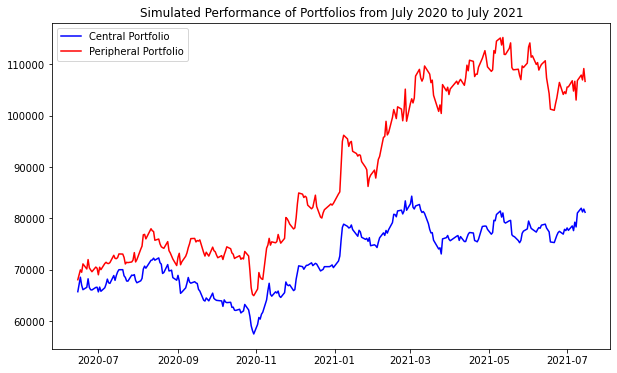

In [23]:
# Perfomance for the minimum spanning tree
fig, ax = plt.subplots(figsize = (10,6))
line2, = ax.plot(st_new2.index,st_new2.Peripheral_stocks,'-b', label='Central Portfolio')
line3, = ax.plot(st_new1.index,st_new1.Central_stocks,'-r', label = 'Peripheral Portfolio' )
ax.set_title('Simulated Performance of Portfolios from July 2020 to July 2021')
ax.legend(loc='upper left')
#plt.savefig('performance of portfolio.png')
plt.show()

## For planar maximally filtered graph we have the following

In [24]:
st = pd.concat([AX,BX,CX,DX,EX,FX,GX,HX,IX,JX],axis=1,keys=['SBK','AGL','TKG','WHL','BAT',
                                                 'SOL','APN','BHP','SHP','SLM'])
st.head(5)

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
1,,,,,,,,,,
15 Jul 2021,12431,59856,4498,5328,288,21450,17227,45332,15570,5906
14 Jul 2021,12791,60599,4490,5365,292,23252,17150,45675,15500,5900
13 Jul 2021,12523,59643,4433,5213,304,22385,17169,45370,15308,5887
12 Jul 2021,13175,59452,4577,5424,300,22511,17272,45209,15964,6030
09 Jul 2021,13321,58800,4514,5511,295,22250,16805,44602,15787,6025


In [25]:
#central stocks
st_03= pd.concat([GX,BX,DX,FX,CX],axis=1,keys=['APN','AGL','WHL',"SOL",'TKG'])
st_03.head(5)

,APN,AGL,WHL,SOL,TKG
1,,,,,
15 Jul 2021,17227,59856,5328,21450,4498
14 Jul 2021,17150,60599,5365,23252,4490
13 Jul 2021,17169,59643,5213,22385,4433
12 Jul 2021,17272,59452,5424,22511,4577
09 Jul 2021,16805,58800,5511,22250,4514


In [26]:
# to numeric
st_0022=st_03.astype('float')
st_0022.head(5)

,APN,AGL,WHL,SOL,TKG
1,,,,,
15 Jul 2021,17227.0,59856.0,5328.0,21450.0,4498.0
14 Jul 2021,17150.0,60599.0,5365.0,23252.0,4490.0
13 Jul 2021,17169.0,59643.0,5213.0,22385.0,4433.0
12 Jul 2021,17272.0,59452.0,5424.0,22511.0,4577.0
09 Jul 2021,16805.0,58800.0,5511.0,22250.0,4514.0


In [27]:
sum_column3 = st_0022["APN"] + st_0022["AGL"] + st_0022["WHL"]+ st_0022["SOL"] + st_0022["TKG"]

st_0022["Central_stocks"] = sum_column3
st_0022.head(5)

,APN,AGL,WHL,SOL,TKG,Central_stocks
1,,,,,,
15 Jul 2021,17227.0,59856.0,5328.0,21450.0,4498.0,108359.0
14 Jul 2021,17150.0,60599.0,5365.0,23252.0,4490.0,110856.0
13 Jul 2021,17169.0,59643.0,5213.0,22385.0,4433.0,108843.0
12 Jul 2021,17272.0,59452.0,5424.0,22511.0,4577.0,109236.0
09 Jul 2021,16805.0,58800.0,5511.0,22250.0,4514.0,107880.0


In [28]:
# change date index into  numeric format
st_0022.index=pd.to_datetime(st_0022.index)
st_0022.head(5)

,APN,AGL,WHL,SOL,TKG,Central_stocks
1,,,,,,
2021-07-15,17227.0,59856.0,5328.0,21450.0,4498.0,108359.0
2021-07-14,17150.0,60599.0,5365.0,23252.0,4490.0,110856.0
2021-07-13,17169.0,59643.0,5213.0,22385.0,4433.0,108843.0
2021-07-12,17272.0,59452.0,5424.0,22511.0,4577.0,109236.0
2021-07-09,16805.0,58800.0,5511.0,22250.0,4514.0,107880.0


In [29]:
st_0022.index=pd.to_datetime(st_0022.index)
st_new3=st_0022.sort_index()['2020-06-15':'2021-07-15']
st_new3

,APN,AGL,WHL,SOL,TKG,Central_stocks
1,,,,,,
2020-06-15,14000.0,38000.0,3201.0,13982.0,2401.0,71584.0
2020-06-17,15300.0,39200.0,3327.0,14357.0,2435.0,74619.0
2020-06-18,14900.0,38835.0,3303.0,14285.0,2477.0,73800.0
2020-06-19,14301.0,39347.0,3430.0,14600.0,2750.0,74428.0
2020-06-22,14897.0,39201.0,3385.0,14011.0,2550.0,74044.0
...,...,...,...,...,...,...
2021-07-09,16805.0,58800.0,5511.0,22250.0,4514.0,107880.0
2021-07-12,17272.0,59452.0,5424.0,22511.0,4577.0,109236.0
2021-07-13,17169.0,59643.0,5213.0,22385.0,4433.0,108843.0


### For peripheral stocks

In [30]:
st_03= pd.concat([HX,AX,JX,EX,IX],axis=1,keys=['BHP','SBK','SLM',"BAT",'HP'])
st_03.head(5)

,BHP,SBK,SLM,BAT,HP
1,,,,,
15 Jul 2021,45332,12431,5906,288,15570
14 Jul 2021,45675,12791,5900,292,15500
13 Jul 2021,45370,12523,5887,304,15308
12 Jul 2021,45209,13175,6030,300,15964
09 Jul 2021,44602,13321,6025,295,15787


In [31]:
# to numeric
st_003=st_03.astype('float')
st_003.head(5)

,BHP,SBK,SLM,BAT,HP
1,,,,,
15 Jul 2021,45332.0,12431.0,5906.0,288.0,15570.0
14 Jul 2021,45675.0,12791.0,5900.0,292.0,15500.0
13 Jul 2021,45370.0,12523.0,5887.0,304.0,15308.0
12 Jul 2021,45209.0,13175.0,6030.0,300.0,15964.0
09 Jul 2021,44602.0,13321.0,6025.0,295.0,15787.0


In [32]:
sum_column3 = st_003["BHP"] + st_003["SBK"] + st_003["SLM"]+ st_003["BAT"] + st_003["HP"]

st_003["Peripheral_stocks"] = sum_column3
st_003.head(5)

,BHP,SBK,SLM,BAT,HP,Peripheral_stocks
1,,,,,,
15 Jul 2021,45332.0,12431.0,5906.0,288.0,15570.0,79527.0
14 Jul 2021,45675.0,12791.0,5900.0,292.0,15500.0,80158.0
13 Jul 2021,45370.0,12523.0,5887.0,304.0,15308.0,79392.0
12 Jul 2021,45209.0,13175.0,6030.0,300.0,15964.0,80678.0
09 Jul 2021,44602.0,13321.0,6025.0,295.0,15787.0,80030.0


In [33]:
# change date index into  numeric format
st_003.index=pd.to_datetime(st_003.index)
st_003.head(5)

,BHP,SBK,SLM,BAT,HP,Peripheral_stocks
1,,,,,,
2021-07-15,45332.0,12431.0,5906.0,288.0,15570.0,79527.0
2021-07-14,45675.0,12791.0,5900.0,292.0,15500.0,80158.0
2021-07-13,45370.0,12523.0,5887.0,304.0,15308.0,79392.0
2021-07-12,45209.0,13175.0,6030.0,300.0,15964.0,80678.0
2021-07-09,44602.0,13321.0,6025.0,295.0,15787.0,80030.0


In [34]:
st_003.index=pd.to_datetime(st_003.index)
st_new33=st_003.sort_index()['2020-06-15':'2021-07-15']
st_new33

,BHP,SBK,SLM,BAT,HP,Peripheral_stocks
1,,,,,,
2020-06-15,34773.0,10678.0,5933.0,325.0,10457.0,62166.0
2020-06-17,35614.0,11119.0,6173.0,322.0,10638.0,63866.0
2020-06-18,35151.0,10738.0,5853.0,326.0,10600.0,62668.0
2020-06-19,34669.0,10709.0,6102.0,318.0,11000.0,62798.0
2020-06-22,34857.0,10520.0,5982.0,307.0,10992.0,62658.0
...,...,...,...,...,...,...
2021-07-09,44602.0,13321.0,6025.0,295.0,15787.0,80030.0
2021-07-12,45209.0,13175.0,6030.0,300.0,15964.0,80678.0
2021-07-13,45370.0,12523.0,5887.0,304.0,15308.0,79392.0


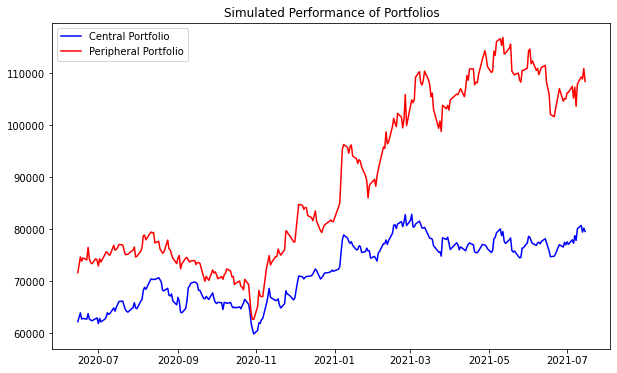

In [35]:
# Perfomance for the Planar maximally filtered Graph
fig, ax = plt.subplots(figsize = (10,6))
line4, = ax.plot(st_new33.index,st_new33.Peripheral_stocks,'-b', label='Central Portfolio')
line5, = ax.plot(st_new3.index,st_new3.Central_stocks,'-r', label = 'Peripheral Portfolio' )
ax.set_title('Simulated Performance of Portfolios')
ax.legend(loc='upper left')
#plt.savefig('performance of portfolio.png')
plt.show()

## Comparison of perfomance of Peripheral stocks for MST and PMFG

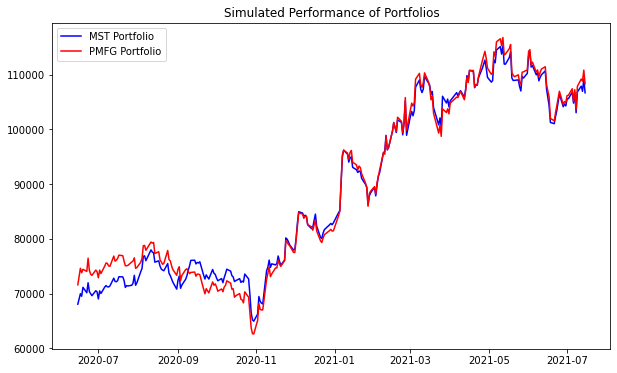

In [36]:
# Perfomance for the Planar maximally filtered Graph
fig, ax = plt.subplots(figsize = (10,6))
line3, = ax.plot(st_new1.index,st_new1.Central_stocks,'-b', label = 'MST Portfolio' )
line5, = ax.plot(st_new3.index,st_new3.Central_stocks,'-r', label = 'PMFG Portfolio' )
ax.set_title('Simulated Performance of Portfolios')
ax.legend(loc='upper left')
#plt.savefig('performance of portfolio.png')
plt.show()

In [37]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import gauss, seed
from math import sqrt, exp

In [38]:
# Stock price simulator

# mu = 0.001
# sigma = 0.01
# start_price = 100

# np.random.seed(0)
# returns = np.random.normal(loc=mu, scale=sigma, size=252)
# price = start_price*(1+returns).cumprod()


def generate_price(s0, mu, sigma):
    
    np.random.seed(1234)
    returns = np.random.normal(loc=mu, scale=sigma, size=30)
    price = s0*(1+returns).cumprod()
   
    return price


In [39]:
st = pd.concat([AX,BX,CX,DX,EX,FX,GX,HX,IX,JX],axis=1,keys=['SBK','AGL','TKG','WHL','BAT',
                                                 'SOL','APN','BHP','SHP','SLM'])
st.head(6)

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
1,,,,,,,,,,
15 Jul 2021,12431,59856,4498,5328,288,21450,17227,45332,15570,5906
14 Jul 2021,12791,60599,4490,5365,292,23252,17150,45675,15500,5900
13 Jul 2021,12523,59643,4433,5213,304,22385,17169,45370,15308,5887
12 Jul 2021,13175,59452,4577,5424,300,22511,17272,45209,15964,6030
09 Jul 2021,13321,58800,4514,5511,295,22250,16805,44602,15787,6025
08 Jul 2021,12810,56040,4415,5415,308,21087,16650,42528,16105,6035


In [57]:
st.index=pd.to_datetime(st.index)
st111=st.sort_index()['2021-01-15':'2021-07-15']
st111

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
1,,,,,,,,,,
2021-01-15,12817,55547,3169,3875,345,16990,14449,44420,13496,5787
2021-01-18,12835,55288,3177,3928,340,16808,14309,43603,13435,5770
2021-01-19,12979,53520,3250,4070,340,17201,14559,42886,14094,5751
2021-01-20,12858,54326,3371,4002,339,16970,14642,44000,13733,5838
2021-01-21,12888,54689,3340,3990,331,16494,14515,43811,13784,5815
...,...,...,...,...,...,...,...,...,...,...
2021-07-09,13321,58800,4514,5511,295,22250,16805,44602,15787,6025
2021-07-12,13175,59452,4577,5424,300,22511,17272,45209,15964,6030
2021-07-13,12523,59643,4433,5213,304,22385,17169,45370,15308,5887


In [58]:
# to numeric
st11=st111.astype('float')
st11

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
1,,,,,,,,,,
2021-01-15,12817.0,55547.0,3169.0,3875.0,345.0,16990.0,14449.0,44420.0,13496.0,5787.0
2021-01-18,12835.0,55288.0,3177.0,3928.0,340.0,16808.0,14309.0,43603.0,13435.0,5770.0
2021-01-19,12979.0,53520.0,3250.0,4070.0,340.0,17201.0,14559.0,42886.0,14094.0,5751.0
2021-01-20,12858.0,54326.0,3371.0,4002.0,339.0,16970.0,14642.0,44000.0,13733.0,5838.0
2021-01-21,12888.0,54689.0,3340.0,3990.0,331.0,16494.0,14515.0,43811.0,13784.0,5815.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-09,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0
2021-07-12,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
2021-07-13,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0


In [59]:
print(st11.dtypes)

SBK    float64
AGL    float64
TKG    float64
WHL    float64
BAT    float64
SOL    float64
APN    float64
BHP    float64
SHP    float64
SLM    float64
dtype: object


In [60]:
price_close = st11.values # convert to numpy array
price_close

array([[12817., 55547.,  3169., ..., 44420., 13496.,  5787.],
       [12835., 55288.,  3177., ..., 43603., 13435.,  5770.],
       [12979., 53520.,  3250., ..., 42886., 14094.,  5751.],
       ...,
       [12523., 59643.,  4433., ..., 45370., 15308.,  5887.],
       [12791., 60599.,  4490., ..., 45675., 15500.,  5900.],
       [12431., 59856.,  4498., ..., 45332., 15570.,  5906.]])

In [61]:
mst = ['BAT', 'BHP', 'SBK', 'SLM']
portfolio_mst = [name for name in mst] # [name for name in mst.index.values]

In [62]:
print(portfolio_mst)

['BAT', 'BHP', 'SBK', 'SLM']


In [63]:
pmfg = ['SLM', 'SBK', 'SHP', 'BAT']
portfolio_pmfg = [name for name in pmfg]

In [64]:
print(portfolio_pmfg)

['SLM', 'SBK', 'SHP', 'BAT']


In [65]:
# Portfolio performance for MST
# Assume you invest R1 000 000 on the portfolio

amount = 1000000
portfolio_price = pd.DataFrame()
for c in portfolio_mst:
      portfolio_price[c] = st11[c]
        
portfolio_unit = portfolio_price.sum(axis=1)[0]
share = amount/portfolio_unit
mst_portfolio_value = portfolio_price.sum(axis=1)*share

In [66]:
portfolio_price

,BAT,BHP,SBK,SLM
1,,,,
2021-01-15,345.0,44420.0,12817.0,5787.0
2021-01-18,340.0,43603.0,12835.0,5770.0
2021-01-19,340.0,42886.0,12979.0,5751.0
2021-01-20,339.0,44000.0,12858.0,5838.0
2021-01-21,331.0,43811.0,12888.0,5815.0
...,...,...,...,...
2021-07-09,295.0,44602.0,13321.0,6025.0
2021-07-12,300.0,45209.0,13175.0,6030.0
2021-07-13,304.0,45370.0,12523.0,5887.0


In [67]:
mst_portfolio_value.head()

1
2021-01-15    1000000.000000
2021-01-18     987044.138301
2021-01-19     977702.030962
2021-01-20     994729.284035
2021-01-21     991730.972558
dtype: float64

In [68]:
# Portfolio performance for PMFG
# Assume you invest R1 000 000 on the portfolio from 16 january
# 2020 to 16 july 2021


amount = 1000000
pportfolio_price = pd.DataFrame()
for c in portfolio_pmfg:
      pportfolio_price[c] = st11[c]
        
pportfolio_unit = pportfolio_price.sum(axis=1)[0]
sshare = amount/pportfolio_unit
pmfg_portfolio_value = pportfolio_price.sum(axis=1)*sshare

In [69]:
pportfolio_price.head()

,SLM,SBK,SHP,BAT
1,,,,
2021-01-15,5787.0,12817.0,13496.0,345.0
2021-01-18,5770.0,12835.0,13435.0,340.0
2021-01-19,5751.0,12979.0,14094.0,340.0
2021-01-20,5838.0,12858.0,13733.0,339.0
2021-01-21,5815.0,12888.0,13784.0,331.0


In [70]:
pmfg_portfolio_value.head()

1
2021-01-15    1.000000e+06
2021-01-18    9.979966e+05
2021-01-19    1.022161e+06
2021-01-20    1.009955e+06
2021-01-21    1.011496e+06
dtype: float64

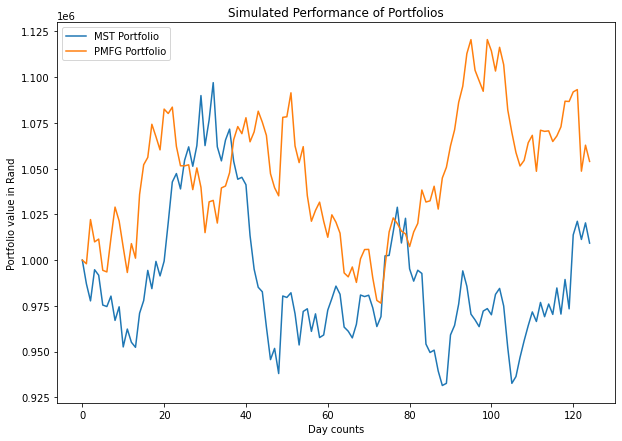

In [73]:
# This perfomance is from from 16 january 2021 to 16 july 2021 (try for just for 125 days)
x = range(125)
fig, ax = plt.subplots(figsize = (10,7))
line1, = ax.plot(x, mst_portfolio_value, label='MST Portfolio')
line2, = ax.plot(x, pmfg_portfolio_value, label = 'PMFG Portfolio' )
ax.set_title('Simulated Performance of Portfolios')
ax.legend(loc='upper left')
plt.xlabel('Day counts')
# Set the y axis label of the current axis.
plt.ylabel('Portfolio value in Rand')
plt.savefig('performance of portfolio.png')
plt.show()

In [ ]:
# now we need to change for January 2020 to 